# Apollo 3 PDM Capture Analyzer

This notebooks communicates to Apollo3 EVB running the PCM capture demo. 

The results are read back through the UART.

Time domain samples and FFT are plotted, and THD+N is calculated.

In [ ]:
# Need the following packages to be installed. Uncomment and execute as needed.
#! pip install PySerial
#! pip install numpy
#! pip install pyplot
#! pip install matplotlib
#! pip install scipy

In [ ]:
import serial
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

from scipy import signal
import matplotlib.pyplot as plt
import analyzer as Y
import thd_calculator as A
from wave_analysis_common import rms_flat, dB

## Open Serial Port  

Run this cell once (per kernel)

In [3]:
port = '/dev/tty.usbmodem0004830868271'

serialPort = serial.Serial(port = port, baudrate=115200,
                           bytesize=8, timeout=2, stopbits=serial.STOPBITS_ONE)

## Get PCM samples from Apollo 3

In [4]:
serialString = ""     # Used to hold data coming over UART
line = ""             # Used to hold decoded Ascii

captureEnabled=False  # Set True when first sample comes in, and False after last sample 

samples = np.array([])

while(1):

    # Wait until there is data waiting in the serial buffer
    if(serialPort.in_waiting > 0):

        # Read data out of the buffer until a carraige return / new line is found
        serialString = serialPort.readline()

        # Decode Ascii
        line = serialString.decode('Ascii')
        
        # remove newlines
        line = line.rstrip()
        

        if 'Send out ALL DMic data!' in line:
            captureEnabled = False;
            break;
        
        if captureEnabled:
            samples = np.append(samples, np.array(line.split(' ')).astype(np.uint32))
            
        else:
            # Print the contents of the serial data (when capture is disabled)
            print(line)
            
        if 'PCM data register values as following:' in line:
            captureEnabled = True;
  

        # Tell the device connected over the serial port that we recevied the data!
        # The b at the beginning is used to indicate bytes!
        #serialPort.write(b"Thank you for sending data \r\n")        
print('\n############################################\n')
print('Samples captured (N = %d)' % (len(samples)))
print('Min = %d' % np.min(samples))
print('Max = %d' % np.max(samples))
samples 

Start to record audio in 2 secs...

Audio recording is terminated and data starts to upload:
115 110 -198 -126 41 -86 15 243
147 -15 83 15 38 -115 -136 -3
137 -72 -57 81 -10 -129 -82 22
-115 -232 47 -130 -41 231 -92 -121
-152 -11 53 -44 -18 117 -37 -22
-133 -119 119 24 89 186 100 33
-23 -45 -76 -146 -28 47 -215 -167
307 18 -374 -54 239 -102 -457 99
370 -197 -196 301 -186 -425 73 154
-128 16 534 138 -533 -160 557 -86
-427 331 438 60 -350 -254 302 62
-279 216 287 -106 -297 -342 272 -99
-174 535 -157 -602 457 399 -723 -343
926 262 -1021 -268 1059 -85 -1103 536
821 -243 -627 259 511 -220 -92 146
168 61 77 -111 49 193 93 21
-53 168 184 -84 -196 208 112 -191
163 1 -287 204 308 -380 -256 518
152 -685 -113 627 -193 -274 120 410
-222 -204 199 13 108 -23 120 -217
150 170 -448 -99 223 160 -183 -282
338 -83 -304 -18 200 58 -254 -95
-27 30 104 78 -297 114 352 -335
-494 209 397 -177 -406 255 433 -535
-391 371 150 -329 35 280 -125 -159
213 -339 -299 697 -24 -591 334 629
-394 -659 513 526 -436 -330 69

21 -6 -12 6 10 10 -20 23
3 -14 8 24 10 0 7 14
5 22 10 8 24 36 19 25
38 25 14 32 28 7 0 24
12 -17 21 2 -16 20 -8 0
-17 2 -24 -38 -19 -10 -24 -28
-22 -33 -39 -30 -37 -32 -21 -31
-23 3 -5 -8 -9 12 20 -7
22 44 11 26 29 10 13 19
19 27 17 13 1 0 -15 -24
-33 -18 -11 -29 -26 5 -19 -2
25 0 7 7 -4 -2 0 8
-8 14 19 9 10 -13 -7 -10
-11 13 -3 -3 -15 -13 -2 -4
5 13 -2 10 6 0 6 3
-20 -9 -23 -19 -19 -41 -12 -21
-17 -14 2 3 -3 16 -2 28
6 15 32 10 15 9 9 8
8 17 -3 -3 -4 -15 5 2
8 4 0 5 -14 -9 -9 -6
-8 -24 0 4 7 36 6 34
18 -11 26 3 -11 6 -3 8
14 25 0 17 33 5 8 22
1 17 18 18 8 0 0 -27
-9 -20 -35 -21 -6 -20 -10 -8
-18 -24 -28 -15 -34 -24 -13 -30
-27 -16 -21 -25 -15 -14 -11 -11
-13 -10 -18 -11 -12 -9 -26 -19
-45 -37 -87 -61 -157 -144 -603 -443
2 22 5 12 2 28 -5 1
13 -6 13 -4 10 4 1 14
-14 0 8 -22 -1 -17 0 -16
-29 -11 -32 -31 -20 -19 -8 0
-1 -12 8 -13 -29 -1 -1 -15
-7 17 21 4 9 5 8 1
10 17 18 21 5 7 13 13
1 9 8 18 1 9 5 6
0 0 -4 2 2 -15 -6 -15
9 8 -3 8 3 11 13 22
45 2 -8 -4 -11 -14 -13 6
18 13 31 19 15 14 -6 

96 142 145 137 144 181 163 104
43 56 68 8 -39 -3 16 -8
-44 3 31 0 -9 -14 -34 -31
-45 -16 -74 -99 -34 -52 -138 -131
-116 -154 -264 -291 -257 -285 -336 -244
-135 -26 51 194 350 429 521 646
700 657 535 449 287 88 -49 -153
-290 -391 -430 -408 -416 -406 -312 -230
-161 -47 19 133 191 193 139 99
133 150 56 41 87 110 43 -16
13 20 -70 -159 -179 -172 -186 -259
-314 -321 -327 -387 -435 -387 -322 -282
-287 -215 -85 34 118 210 319 393
406 451 506 529 537 502 428 321
244 245 185 48 -34 -53 -118 -253
-307 -242 -254 -382 -433 -341 -256 -271
-259 -68 58 16 -11 90 204 169
63 62 101 5 -139 -190 -148 -143
-190 -173 -87 -9 33 98 182 240
254 281 291 264 218 178 133 80
56 19 -1 -21 -37 -33 -29 -49
-63 -76 -82 -103 -114 -139 -122 -133
-111 -81 -16 19 78 174 645 1061
-78 -43 -8 41 104 112 92 88
68 2 -65 -147 -204 -232 -263 -247
-215 -156 -71 1 78 199 289 360
407 431 456 390 272 190 104 4
-118 -206 -212 -233 -280 -270 -225 -159
-134 -127 -55 1 0 13 32 62
15 -25 -9 21 9 9 15 27
10 -6 -6 5 -27 -48 -77 -71
-97 -14

282 426 561 723 890 935 794 594
420 241 -19 -352 -661 -828 -919 -957
-964 -913 -759 -587 -426 -248 -43 203
430 530 565 570 593 616 571 487
396 349 285 163 15 -124 -195 -253
-302 -329 -365 -363 -331 -271 -180 -99
-15 75 135 184 226 255 245 208
154 105 33 -35 -83 -124 -142 -118
-94 -50 -96 -128 -119 127 577 1132
317 263 -22 -251 -286 -366 -579 -671
-480 -160 -2 -21 118 458 732 738
531 418 454 455 322 35 -254 -449
-512 -521 -596 -704 -637 -389 -182 -136
-101 90 404 566 511 399 381 447
448 368 319 310 273 155 -21 -161
-286 -427 -578 -658 -664 -641 -598 -520
-385 -216 -73 41 143 267 336 358
302 242 160 100 64 53 64 136
247 339 364 394 434 474 409 247
119 64 -26 -208 -423 -556 -598 -614
-650 -697 -688 -602 -499 -398 -271 -71
179 429 632 793 958 1104 1063 858
618 419 243 19 -208 -405 -593 -703
-738 -708 -681 -630 -545 -381 -219 -68
68 200 274 283 241 256 287 299
266 220 171 132 80 9 -89 -181
-259 -368 -484 -532 -529 -552 -613 -600
-421 -117 119 281 510 774 982 1056
1042 1005 916 741 443 108 -

150 133 58 -83 -246 -412 -508 -543
-484 -391 -247 -65 157 391 659 861
955 852 566 203 -117 -295 -289 -126
110 289 332 219 0 -248 -440 -585
-687 -795 -860 -817 -641 -260 268 807
1217 1307 1054 665 318 54 -133 -249
-279 -284 -282 -305 -282 -192 -107 -88
-139 -231 -292 -303 -213 -66 98 181
177 126 99 95 119 113 72 0
-12 34 125 177 160 35 -149 -324
-368 -298 -177 -118 -81 -25 123 289
466 538 479 235 -18 -137 -11 285
604 753 605 226 -229 -525 -534 -337
-51 138 136 -51 -286 -447 -451 -309
-85 117 193 148 56 74 234 432
493 322 -25 -326 -417 -210 141 355
300 -7 -400 -702 -732 -429 81 519
657 423 -25 -484 -697 -540 -102 356
661 665 441 113 -173 -319 -353 -326
-295 -276 -239 -168 -51 75 175 142
32 -116 -166 -92 103 277 386 335
207 49 -37 -105 -43 7 92 65
82 -12 62 -8 222 12 662 -185
727 356 -147 -713 -1133 -1195 -883 -384
144 554 745 696 428 111 -89 -160
-126 -47 53 128 189 190 185 135
63 -86 -277 -453 -584 -636 -564 -376
-152 62 238 361 429 370 228 77
12 37 164 304 419 369 167 -159
-481 -690 -6

42 18 -31 -61 -66 -50 -38 -9
12 39 37 25 0 -10 -8 12
41 52 49 41 20 17 -9 -19
-12 1 22 33 35 24 5 -11
-26 -28 -23 -12 -8 0 4 1
0 -2 -1 3 -8 -20 -23 -20
-19 -15 -23 -23 -35 -27 -41 -22
-40 -32 -68 -53 -160 -168 -687 -566
14 0 -21 -30 -39 -36 -16 5
26 24 6 -5 -20 -27 -50 -39
-33 -8 4 4 -13 -32 -38 -37
-22 -6 22 44 30 17 10 -4
-16 -23 -12 7 22 30 27 12
-9 -4 -13 -16 -18 -3 3 4
3 4 -4 -14 -21 -14 -11 5
12 28 26 26 25 21 14 8
-2 6 18 26 30 20 6 -8
-14 -15 -18 0 5 11 3 8
-3 -2 -6 1 1 6 9 10
21 26 15 5 -1 -13 -18 -33
-24 -6 11 10 6 -6 -15 -30
-34 -40 -42 -25 -6 14 24 29
19 16 9 9 4 13 24 38
36 28 16 11 3 2 -2 -17
-28 -27 -16 -1 -4 -4 -10 -4
-8 -6 -6 -4 -2 0 0 0
-9 -20 -35 -23 -24 -23 -20 -12
-4 2 4 -11 0 -7 -2 6
14 14 3 3 11 7 -17 -15
-16 -1 7 14 26 30 20 11
3 -6 -19 -20 -3 9 8 0
1 -15 -17 -39 -35 -38 -24 -4
25 29 35 36 33 25 14 -9
-17 -13 -16 -3 4 10 -2 -5
-11 -13 -8 11 12 24 23 30
18 17 7 17 9 17 1 2
-10 -5 -23 -14 -30 -5 -15 18
6 64 31 128 99 401 513 1355
28 25 14 8 10 18 15 1
0 1 2 8 26 3

8 14 8 7 1 7 6 0
-3 -3 5 11 17 21 17 10
-2 0 -7 -4 -4 3 2 4
9 7 2 1 2 9 4 13
15 20 6 11 0 4 0 1
-3 2 1 0 -2 -13 -18 -31
-29 -30 -20 -20 -8 -8 -4 -1
1 3 21 28 31 34 37 37
34 22 20 18 18 8 10 12
21 22 31 31 32 21 25 14
15 17 17 8 11 10 6 0
2 2 3 -13 -10 -7 -3 -8
-19 -25 -25 -34 -27 -25 -14 -18
-15 -23 -15 -20 -18 -13 -7 -3
3 -1 3 0 7 -3 -4 -4
-3 8 9 9 16 12 22 14
16 1 8 0 11 1 10 -5
3 -12 -10 -33 -13 -37 -13 -48
-3 -70 -6 -121 9 -290 131 -854
-22 -21 -17 -9 6 19 21 15
4 -4 -7 -16 -15 -16 -18 -22
-28 -31 -25 -18 -3 -3 -4 -7
-9 -17 -16 -8 -5 6 10 22
25 28 31 36 40 32 28 12
7 5 -4 -5 -8 1 0 9
6 5 9 20 20 21 11 10
5 3 3 -1 -1 0 -4 -1
-5 -16 -20 -17 -22 -28 -29 -34
-37 -40 -30 -21 -10 -3 7 9
7 -5 -5 -3 -3 -1 -6 -10
-16 -19 -19 -16 -13 -13 -20 -22
-16 -5 5 10 14 16 22 14
13 15 17 23 28 28 29 22
14 5 1 0 3 -6 -8 -12
-13 -7 0 4 7 0 -2 -14
-12 -13 -3 -1 -1 1 2 1
7 7 7 5 4 3 0 -5
-8 -17 -23 -28 -35 -35 -32 -26
-25 -21 -16 -16 -19 -16 -15 -10
-8 -4 -4 -1 0 9 7 17
11 8 0 1 -1 -3 -5 -14
-11 -6 -5 -4 

-21 -24 -34 -44 -48 -55 -46 -38
-28 -25 -20 -24 -24 -19 -14 -3
2 1 -2 -8 0 -1 10 18
27 36 32 27 26 32 35 28
17 20 15 16 17 10 3 -5
-16 -22 -26 -26 -20 -7 0 3
16 11 2 0 6 7 2 -9
-12 -24 -31 -23 -19 -5 -4 -6
-13 -20 -18 -28 -28 -17 -13 -5
0 6 10 16 16 7 19 18
13 12 5 13 18 17 7 6
-2 -9 -12 0 -9 -10 -9 -5
-2 -1 -2 0 1 0 6 3
8 14 10 9 7 3 1 -3
2 4 14 12 4 -2 -11 -12
-17 -11 -17 -13 -13 -14 -7 7
8 17 19 14 3 7 4 -4
-10 -11 -12 -12 -13 -20 -27 -19
-20 -9 0 -3 5 14 5 3
-16 -13 -6 8 7 11 -7 -5
1 1 6 18 22 12 11 3
-6 8 4 6 -3 -6 -21 -17
-31 -17 -15 15 -11 20 -20 8
-48 -11 -99 -14 -245 -86 -1010 -234
-20 -22 -20 -24 -21 -26 -11 -4
-2 -6 12 11 18 29 45 47
41 31 19 26 17 20 25 21
21 25 23 28 25 20 18 7
1 -3 2 16 -15 -5 1 -15
-19 -23 -32 -32 -29 -15 4 4
8 -2 -2 -12 -19 -17 -9 -5
2 -3 6 14 21 1 -9 -9
-4 5 3 16 13 -1 -12 -14
-8 -7 -11 -13 -10 -15 -11 -9
5 8 11 19 6 3 1 -3
9 0 -11 -15 -17 -15 -18 -27
-27 -33 -25 -29 -43 -41 -23 -14
-5 12 12 15 20 11 17 9
16 16 21 23 14 13 -5 -25
-21 -29 -18 -10 -2 0 -

-14 -22 -26 -34 -27 -17 -4 -5
0 -10 -3 -17 -6 -6 -9 -17
-11 -24 -6 -33 -4 -78 14 -183
29 22 20 15 17 14 9 3
5 11 18 33 35 31 44 51
35 28 8 6 -9 -8 -12 -11
-4 -1 -1 -8 -15 -16 -13 -7
-6 0 0 2 -7 -9 -10 -8
-7 5 5 22 25 13 -10 -9
-11 -9 -10 -1 0 -3 3 8
4 14 17 16 17 13 6 4
12 7 3 -1 2 3 5 1
0 16 11 12 5 3 2 14
9 7 3 -9 -12 -19 -26 -26
-25 -32 -30 -25 -30 -35 -31 -27
-19 -13 -14 -12 -12 -14 -18 -32
-34 -30 -24 -12 1 3 2 -3
-9 -15 -11 -7 6 12 20 28
30 24 22 11 16 21 34 37
31 18 7 0 -10 -7 -14 -1
-2 8 13 22 22 15 14 9
7 18 11 17 17 10 13 7
-6 -8 -12 -16 -18 -12 -7 -16
-16 -34 -47 -45 -33 -31 -24 -8
-11 -16 -26 -24 -30 -16 0 5
3 23 27 26 26 19 8 0
-1 -13 -7 -15 -5 -3 5 4
0 19 19 17 19 12 1 15
6 5 8 12 6 5 14 15
27 22 6 6 7 0 1 5
16 7 7 13 12 19 21 23
18 16 13 14 14 5 6 0
-6 -14 -6 -21 -23 -61 -158 -272
-12 -13 -10 -16 -14 -18 -21 -27
-20 -19 -13 -16 -16 -14 -12 -10
-1 3 4 3 5 -4 0 3
11 12 15 12 21 22 19 13
16 18 16 12 8 4 4 -1
-8 -11 -3 2 9 10 1 -4
-12 -7 -9 -12 -3 -9 -3 -11
-2 0 6 9 0 -9 -14

-21 -14 -12 -5 -4 -10 -7 -12
-15 -8 -23 -20 -31 -34 -39 -36
-37 -20 -8 -6 -1 -8 -6 -3
-11 -5 -7 2 -1 3 6 7
11 14 8 13 8 12 22 13
22 14 14 13 12 3 6 20
21 13 10 -4 -4 1 0 -3
-1 -1 -2 -1 -10 -11 -2 -1
-1 -5 1 1 0 2 2 0
-2 -1 -6 -2 -2 2 4 17
20 18 1 7 2 5 -2 -8
-17 -22 -19 -15 -14 -3 3 19
11 18 13 27 11 21 -6 13
0 32 14 100 58 283 281 861
22 13 24 25 23 5 4 0
0 0 -1 0 -1 -1 10 16
2 -3 0 -3 0 0 -6 -8
0 1 3 8 10 7 11 5
-3 1 0 -4 3 2 10 6
5 -7 -7 -9 -15 -17 -14 -9
-13 -1 -6 -16 -23 -24 -32 -28
-31 -26 -17 -5 1 6 10 12
19 19 15 21 17 27 18 16
-1 -4 2 4 19 25 33 31
33 35 40 32 17 9 4 14
3 12 0 10 10 9 9 16
8 19 7 1 -2 -5 -5 -3
-8 -12 -7 -2 -1 4 -5 0
-4 -1 0 12 4 4 1 -3
-9 -14 -20 -8 -6 -4 5 11
21 16 15 3 3 -5 -8 -7
-9 -6 0 1 8 9 11 10
11 11 10 -2 -1 -8 -5 -11
-16 -16 -22 -19 -24 -20 -20 -8
-8 -3 -1 -7 2 5 -1 -1
-7 -3 -2 0 8 24 28 33
41 38 37 32 21 12 18 11
17 23 14 16 7 1 0 0
-9 -3 6 7 13 -4 -11 -10
-12 -5 -5 -17 -11 -18 -15 -13
-16 -15 -11 -3 1 0 -5 -5
-14 -30 -21 -29 -23 -29 -25 -30
-26 -24 

30 37 5 7 7 6 -2 7
3 7 11 -11 -13 -17 -9 -27
-11 2 12 -8 -6 -3 -10 -14
-22 -23 -28 -31 -26 -29 -33 -27
-14 -10 0 4 16 10 5 0
2 0 2 9 13 18 14 16
17 9 2 -2 -2 4 4 2
1 2 -5 -11 -10 -15 0 5
7 -3 6 0 10 -1 -9 -13
-15 -26 -10 -3 16 12 17 16
24 16 10 4 -2 -3 -4 4
7 18 31 35 33 36 31 30
34 35 46 48 39 22 10 5
7 -2 0 4 -4 -20 -27 -26
-17 -23 -13 -22 -14 -16 -6 -12
-14 -13 -7 -5 -5 1 10 0
-2 -13 1 5 14 -6 0 -9
4 -6 0 1 0 -1 -1 12
6 11 3 4 6 0 -5 -8
-12 -27 -14 -24 -15 -11 -2 -9
-14 -21 -20 -17 -10 2 20 26
29 24 23 22 13 4 -10 -23
-31 -45 -39 -40 -25 -32 -20 -17
1 6 14 14 26 17 28 22
30 19 27 23 25 9 16 0
10 -13 7 -21 9 -27 8 -29
40 -16 71 -33 171 -97 634 -428
40 26 18 19 9 10 2 -4
0 0 14 19 23 4 -3 -20
-16 -8 -6 12 -1 5 -14 -9
-10 -14 -12 -20 -18 -20 -29 -39
-29 -26 -15 -16 -4 -11 1 -6
11 10 12 10 14 8 3 2
0 -2 -2 1 11 19 21 17
15 13 11 13 14 11 5 -3
-10 -13 -17 -8 9 14 23 16
7 -2 -10 -7 -11 0 8 18
9 4 -5 -14 -16 -20 -7 -20
-7 -12 0 -12 -17 -23 -21 -18
-26 -31 -27 -23 -23 -18 -9 -4
-15 -14 -23 

-105 -338 -457 -443 -421 -459 -382 -11
149 165 214 197 26 -124 -203 9
28 42 202 273 342 341 244 310
160 -41 15 -16 15 -111 -433 -489
-512 -436 -96 196 566 636 404 308
167 -38 -184 -312 -185 -231 -373 -264
-133 54 29 5 39 -159 -336 -409
-533 -290 -355 -144 108 219 434 577
596 706 587 644 923 803 649 365
29 -214 -415 -522 -443 -490 -521 -734
-960 -920 -696 -422 -143 194 437 483
373 335 391 308 209 235 271 281
194 91 72 -72 -226 -281 -351 -310
-236 0 238 120 -84 -245 -334 -322
-433 -297 -56 -105 -48 152 446 711
622 614 522 45 -222 -351 -274 -325
-570 -445 -129 56 331 433 481 329
-100 -319 -495 -586 -617 -627 -419 -79
249 640 881 1015 829 438 4 -362
-575 -621 -517 -186 185 413 443 303
262 32 -385 -589 -650 -686 -605 -577
-87 390 595 800 831 717 545 154
139 120 -64 -194 -338 -427 -401 -446
-252 -112 -163 -195 -234 -274 -89 -71
96 65 209 135 612 545 2567 1756
441 873 1116 1069 842 658 579 454
271 153 0 -237 -456 -380 -36 122
-57 -454 -902 -1332 -1405 -940 -132 467
645 450 254 -63 -281 -275 1

-35 -42 -62 150 -200 1 36 -284
-10 -44 -177 68 42 -222 -47 27
-139 -17 -131 -180 -49 0 -36 65
93 -98 -246 -42 -92 -205 122 100
-225 173 68 -388 -40 151 -93 -31
173 26 -33 41 -137 132 -73 -268
193 -93 108 7 -56 105 -54 130
3 -120 211 34 55 61 -56 -106
-69 94 -55 29 132 -65 144 -15
-184 -143 -81 104 -53 -43 219 40
-89 -174 186 -38 -469 314 286 -101
149 -162 -30 6 -423 104 90 68
419 -124 -144 -15 -256 -331 -104 321
-52 55 424 -102 -251 22 68 -319
-61 468 186 -254 132 44 -181 -208
-91 230 46 110 226 -147 49 -81
-116 -135 28 460 -219 -136 483 -356
-179 -115 133 138 -261 365 58 -20
213 -369 303 152 -28 288 20 327
310 -1 629 451 987 1372 4250 4145
2 381 -295 7 43 66 75 -116
45 72 -43 -297 76 273 -167 -56
277 -49 123 12 -79 82 103 -153
-300 50 157 -298 130 167 -262 180
-54 -36 259 -51 45 122 44 91
-190 199 -104 -281 214 -309 339 30
-277 473 -273 -10 24 -237 114 -19
-55 34 -71 -15 44 -128 -16 123
106 57 -32 8 66 -65 -198 -76
82 -92 119 94 21 -168 -43 -30
-213 -137 -76 285 138 -144 408 -62
-356 

-143 -210 -255 -295 -274 -253 -205 -167
-140 -118 -98 -96 -78 -57 -30 14
81 126 193 236 228 214 205 162
122 97 59 40 19 0 -26 -34
-56 -87 -101 -134 -151 -179 -171 -175
-156 -124 -82 -55 -10 10 38 48
52 44 48 42 38 42 65 79
80 44 3 -74 -122 -151 -139 -92
-21 46 115 133 142 87 32 -21
-59 -62 -35 2 38 79 63 43
19 -12 -16 -28 -33 -26 -44 -32
-23 -29 -3 -53 -75 -67 -75 -27
-2 48 49 59 53 29 33 20
20 49 63 102 90 52 1 -46
-75 -68 -15 36 83 79 40 -24
-89 -130 -134 -138 -83 -37 -10 35
40 15 1 -25 -49 -54 -35 -20
8 34 39 28 16 2 -18 -30
-21 -17 11 18 18 -10 -48 -102
-104 -125 -74 -66 24 60 433 559
110 152 200 182 132 78 -14 -77
-103 -95 -62 15 93 164 191 198
154 70 -26 -100 -151 -149 -114 -48
5 62 114 84 48 -17 -91 -136
-147 -116 -74 0 53 87 118 77
15 -56 -134 -193 -204 -175 -116 -47
27 53 66 30 -2 -44 -51 -54
-33 0 29 36 55 43 26 5
2 -19 -22 -7 -2 4 25 30
46 65 73 58 46 2 -33 -58
-77 -81 -51 -29 -4 13 24 18
-1 -20 -49 -72 -78 -62 -31 -11
18 34 44 46 23 -23 -52 -65
-76 -87 -68 -73 -42 -29 -36 -

-35 -39 -37 -29 -29 -35 -35 -30
-30 -18 -7 0 5 -1 1 -1
0 1 -8 -4 -14 -7 -9 -1
15 36 39 43 33 35 29 32
26 32 22 29 20 26 13 30
21 46 29 53 46 81 56 94
63 135 84 237 176 615 608 1893
-1 4 0 0 -1 3 3 13
15 21 23 26 22 20 10 6
-2 -8 -24 -41 -46 -38 -46 -31
-25 -22 -11 -16 -20 -32 -44 -40
-43 -35 -32 -34 -34 -27 -24 -10
0 12 11 16 10 4 -9 -2
-6 -4 4 5 8 18 14 18
11 -1 0 -4 -13 -10 -10 -11
-15 -15 -18 -21 -23 -15 -9 -7
-6 -10 -2 0 -6 -9 -10 -16
-21 -13 -13 -19 -18 -9 -11 -14
-9 -18 -21 -13 -3 0 3 1
-6 -4 2 6 7 1 0 -5
-5 -12 -12 -8 0 5 22 23
29 18 8 4 -3 8 8 6
4 -2 -3 -4 -11 -5 -10 -12
-6 -4 -3 3 0 6 8 14
6 6 4 1 -3 -5 -18 -14
-22 -6 -16 -11 -10 -9 -18 -25
-20 -14 -13 1 4 4 3 -1
-2 -3 -19 -16 -18 -19 -15 -18
-25 -20 -23 -26 -7 -5 10 5
3 4 1 4 6 2 -2 -3
-12 -8 -14 -4 -3 1 -5 -2
-10 -14 -8 -3 3 10 3 4
-9 -5 -5 -4 5 11 -1 8
0 1 -2 -3 -8 -8 5 14
11 22 6 9 5 9 4 19
12 22 1 11 -8 11 -21 11
-18 27 -33 46 -84 119 -411 252
11 21 16 19 24 17 24 22
19 14 6 -10 -12 -20 -15 -2
1 -7 -15 -24 -33 -35 -44 -46

-7 -8 -7 -13 -28 -38 -30 -27
-21 -19 -20 -11 -11 -1 -2 -10
-16 -16 -16 -23 -19 -20 -7 -1
-3 -5 -13 -20 -15 -18 -20 -10
-15 -9 -2 -3 8 7 4 8
11 10 14 18 16 18 19 10
6 -5 9 4 9 11 10 12
3 -2 -4 -3 -7 -4 -4 -9
-19 -23 -24 -20 -18 -13 -7 -7
-8 -10 -13 -20 -22 -32 -31 -27
-19 -8 0 18 22 18 23 18
21 17 26 21 26 26 20 21
22 28 23 26 25 11 16 12
8 14 1 4 9 6 6 -5
-13 -25 -26 -21 -20 -13 -1 6
13 12 22 21 23 15 13 15
15 9 7 -3 -11 -11 -11 -9
6 3 6 11 15 11 9 2
0 -2 -4 3 2 0 -5 -14
-5 -8 1 0 0 -3 -5 -26
-30 -49 -50 -93 -115 -244 -498 -825
17 4 1 -7 -7 -15 -7 -13
-19 -22 -13 -1 0 11 19 18
24 11 3 1 -1 2 5 2
-2 -4 3 -1 3 -1 -6 -2
4 11 20 21 33 29 31 26
16 12 3 5 4 1 8 6
3 1 -4 -7 -4 -6 -4 -4
-4 -1 0 2 7 9 6 5
3 7 16 6 8 3 1 6
-3 -9 -7 -7 -5 -5 -8 0
3 16 13 7 6 7 -2 0
-4 -8 -6 4 -3 8 1 -17
-16 -22 -18 -13 -13 -12 -11 -18
-16 -26 -22 -23 -14 -10 -7 -4
-8 -11 -23 -29 -17 -15 -17 -9
-2 7 11 23 18 20 24 20
18 18 9 15 8 11 5 9
0 2 -5 -5 -6 -8 -7 -10
-18 -24 -35 -36 -27 -28 -23 -26
-31 -12 -5 -4 0 5 4 7
4

108 -87 -273 -401 -321 -189 -15 88
155 186 278 282 249 53 -33 -157
-46 -59 50 -215 -219 -1024 -1099 -3099
-24 -52 -51 -40 -66 -170 -284 -314
-215 -57 28 9 -178 -441 -554 -491
-229 114 300 280 148 -93 -230 -167
55 326 530 565 449 278 126 34
26 63 99 91 41 -40 -107 -141
-167 -225 -246 -258 -223 -149 -78 -22
11 8 8 8 50 94 159 177
165 106 60 19 36 49 74 30
-5 -57 -56 -31 12 0 -13 -59
-87 -80 -40 0 34 11 -20 -58
-40 6 80 114 119 75 31 9
23 31 57 36 -2 -39 -70 -87
-99 -108 -120 -164 -184 -205 -181 -122
-60 -25 -1 -22 -1 12 68 113
141 137 114 66 51 49 70 80
87 59 43 13 -14 -34 -41 -45
-29 -31 -20 -35 -33 -35 -18 -4
21 30 33 11 10 5 -3 -8
-18 -4 -4 -8 -31 -52 -70 -69
-53 -25 -18 -32 -59 -75 -71 -54
-55 -50 -63 -72 -72 -54 -35 -8
-1 -7 -8 6 21 51 48 40
37 34 40 55 55 45 33 31
26 37 38 41 38 40 45 48
31 17 -2 17 30 56 56 41
5 -3 8 36 55 71 54 37
27 31 25 13 -21 -50 -74 -83
-88 -73 -83 -76 -78 -49 -38 6
1 1 -36 -34 -72 -23 -63 -21
-99 -51 -196 -92 -424 -222 -1659 -680
-23 -28 -42 -45 -65 -84 -99

28 -8 -75 -85 -79 -79 -59 34
30 2 -80 -184 -187 -141 -218 -113
-123 -155 -60 -144 -196 5 -98 -162
-43 -24 -19 39 -17 -33 -49 -25
68 62 25 173 178 46 71 136
-3 -88 98 86 47 78 -14 -15
-113 -80 75 -26 -137 25 -77 -98
109 123 -10 128 183 30 102 130
38 97 52 53 57 22 -57 -66
-88 -73 -65 -102 -89 18 -76 -12
-1 -91 -97 -74 -103 -115 -110 -51
-85 -68 65 -7 -23 52 -84 10
26 -2 167 214 231 125 124 56
-38 137 71 201 325 183 165 126
0 -10 87 60 4 197 162 -32
20 -63 -160 -100 -113 -6 32 -29
30 3 -49 -84 -92 -123 -156 32
49 -15 24 -62 -93 -187 -119 -64
-109 0 79 7 -20 -44 -178 -176
-54 20 40 70 37 38 -66 -93
-56 -16 30 74 -45 98 -16 -11
51 26 78 172 1 226 33 226
230 197 200 569 72 1276 133 3427
-93 109 -38 134 71 42 166 17
93 243 -228 -28 202 -124 -35 181
-46 -60 236 -169 -225 83 -29 -79
-5 101 111 -29 -267 -35 106 -205
-51 128 72 -108 -217 -147 38 -237
-50 230 -127 24 -24 -160 -9 -93
28 120 -65 127 98 -81 89 -43
15 199 -148 -149 141 79 -102 123
30 96 26 -141 50 3 23 66
23 228 -55 -78 76 12 -4 -107

3 -2 3 -18 -4 -9 -18 2
7 -8 -31 -14 -8 -11 -18 -4
-3 -15 -31 3 -14 -17 6 -34
-14 -3 -23 -31 5 -12 -14 -6
-11 20 8 26 19 23 36 -1
0 12 13 0 8 31 12 25
17 22 5 -14 -6 -2 -15 2
5 -4 4 0 -10 1 -10 6
-8 7 -6 4 13 -8 0 0
-10 -5 6 -11 13 22 9 29
35 30 18 29 22 0 1 8
-4 22 9 -1 35 35 15 19
31 13 -36 -8 0 -41 -48 -14
-45 -26 -32 -9 2 -2 12 8
1 13 -18 6 6 1 8 7
0 17 -27 16 -2 18 -11 47
3 62 -6 135 -23 411 -69 1229
0 -17 30 -4 10 27 28 19
5 31 6 11 2 6 -4 -9
-5 1 -8 -13 -8 -3 -5 -18
-13 0 -35 -21 -17 -34 -23 -22
-16 -10 -29 -25 0 -30 -11 -9
-8 0 4 7 5 16 10 9
17 11 10 5 -5 12 3 0
15 15 9 14 32 22 16 44
26 11 31 9 12 1 13 -3
-19 7 -13 -19 -12 -24 -28 -51
-45 -20 -56 -53 -31 -29 -31 -18
-11 -27 -23 -6 -31 -28 -11 -21
15 3 3 2 11 6 -13 9
4 -13 -14 0 4 -26 0 21
-14 14 5 -13 -17 -5 4 -19
11 8 11 37 31 37 16 12
29 -15 17 24 0 -13 -2 -16
-27 -7 -4 -14 -8 -5 -6 2
0 7 -1 13 8 -11 11 4
4 -8 -10 -8 -12 -24 -6 -9
-5 -10 1 18 -13 -9 6 -9
-3 0 -12 1 0 4 5 2
-5 -4 4 0 5 -5 -10 4
-6 -22 -6 1 -16 -28 -5 -14
-20 -

-507 -436 -317 -191 -75 20 88 144
175 193 201 215 222 196 136 124
165 175 145 128 168 181 149 119
130 130 84 40 21 -32 -69 -102
-100 -110 -120 -100 -87 -118 -103 -67
-31 -71 -71 -30 13 -46 -62 -44
38 -21 -4 -37 148 -15 533 -80
-62 18 92 74 -16 0 70 38
-43 -41 36 80 36 42 107 103
56 12 4 -27 -107 -178 -218 -217
-154 -108 -78 -13 62 122 89 64
144 181 118 59 83 140 57 -41
3 66 1 -118 -102 -17 -37 -140
-123 -13 49 -8 -15 77 124 75
27 0 -13 -96 -193 -265 -301 -346
-414 -486 -484 -445 -420 -387 -295 -198
-125 -86 17 151 229 264 280 290
297 279 304 347 371 374 369 365
360 334 289 216 130 28 -74 -175
-272 -367 -441 -502 -547 -568 -543 -503
-439 -370 -283 -177 -44 63 121 166
218 246 260 251 255 230 170 101
62 37 31 11 13 34 37 41
55 80 108 100 93 99 87 91
100 132 175 216 233 250 250 247
203 150 111 67 -33 -96 -139 -131
-170 -211 -195 -134 -120 -90 -66 8
51 42 35 47 39 -5 -52 -41
-29 -34 -22 5 29 38 55 109
134 121 83 65 59 10 -37 -42
-57 -74 -100 -74 -34 -10 -2 42
88 106 111 141 144 125 103 130


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (128,) and (0,)

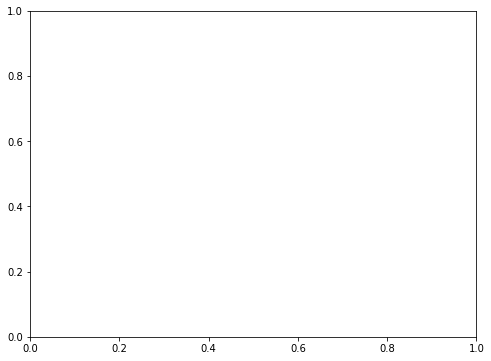

In [5]:
# generate a test 1kHZ signal for calculation verification
#freq_base = 1000
#freq_noise = 3000
#fs = 16000
#sig_length = 32000
#samples = np.array([0.]*sig_length)
#noise = np.array([0.]*sig_length)
#mean = 0
#std = 1000
#white_noise = np.random.normal(mean, std, size=sig_length)
#for indx in range(sig_length):
#    samples[indx] = 32768.*np.sin(2*np.pi*freq_base*indx/fs) 
#    noise[indx] = 1000.*np.sin(2*np.pi*freq_noise*indx/fs)

#samples = samples + noise + white_noise

for i in range(len(samples)):
    samples[i] = np.int16(samples[i]/32768)

Nskip = 1024
Nsamp = 128


plt.figure(figsize=(8,6))
plt.plot(np.arange(Nskip, Nskip+Nsamp), samples[Nskip:Nskip+Nsamp], 'x-')
plt.title('Time Domain Samples')
plt.xlabel('Sample')
plt.ylabel('Code')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
Y.plotFFT(samples/2**13, fs, log=False)
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('FFT Magnitude [dB]')
plt.title('FFT of PCM Samples (THD+N=%.2f dB)' % Y.THDN(samples))
plt.xlim([0, fs/2])
plt.tight_layout()

In [ ]:
plt.figure(figsize=(8,6))
Y.plotFFT(samples/2**13, fs, log=True)
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('FFT Magnitude [dB]')
plt.title('FFT of PCM Samples (THD+N=%.2f dB)' % Y.THDN(samples))
plt.xlim([1, fs/2])
plt.tight_layout()

In [ ]:
    
print('    Number of samples = %d' % (len(samples)))
print('Fundamental Frequency = %.2f Hz' % (Y.freqEstimator(samples, fs)))
print('                THD+N = %.2f dB' % (Y.THDN(samples)))
#print('                 ENOB = %.2f bits' % ((THDN(samples)*(-1)-1.76)/6.02))

In [ ]:
A.THDN(samples)

In [ ]:
A.THD(samples)

In [ ]:
np.int16(65535)